# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

# **Redes Neuronales: Perceptrón**

En este cuaderno, se cubriran los siguientes temas:

### 1. Perceptrón y el problema de la compuerta AND
### 2. Perceptrón sobre un conjunto de datos aleatorio
### 3. Clasificación binaria usando el Perceptron

## 1. Perceptrón y el problema de la compuerta AND

In [1]:
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Datos de entrada para la compuerta AND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas correspondientes a la salida de la compuerta AND
y = np.array([0, 0, 0, 1])

print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]


**Primer paso:**

En este ejercicio, utilizaremos datos de entrada para la compuerta lógica **AND** y entrenaremos un **Perceptrón** utilizando la implementación de scikit-learn. No es necesario especificar ningún parámetro de entrada al utilizar el estimador `Perceptron` de scikit-learn. Esta función proporciona valores predeterminados sensibles que son adecuados para muchos problemas de clasificación básicos, lo que hace que sea fácil comenzar sin tener que preocuparse por ajustar los parámetros.

**Parámetros después del entrenamiento:**

Una vez que el Perceptrón ha sido entrenado en los datos de entrada, puede proporcionar algunos atributos útiles:

1. **`coef_`**: Los pesos asignados a las características. Estos pesos se utilizan para calcular la salida del Perceptrón para nuevas muestras.

2. **`intercept_`**: El término de sesgo o intercepción añadido a la salida. En esencia, es un término constante que se suma al producto de los pesos y las características.

In [4]:
# Instanciar el estimador
model = Perceptron()

# Entrenar el modelo
model.fit(X, y)

# Imprimir los coeficientes (pesos) y el término de sesgo (intercepción)
print("Coeficientes (pesos):", model.coef_)
print("Término independiente:", model.intercept_)

# Predecir con el modelo entrenado
y_pred = model.predict(X)

#Imprimir las predicciones
print("Predicciones:", y_pred)

Coeficientes (pesos): [[2. 2.]]
Término independiente: [-2.]
Predicciones: [0 0 0 1]


####**Entender la curva de decisión:**
La curva de decisión es una línea (o límite en general) que separa las diferentes clases en el espacio de características. Esta línea se determina por los pesos y el sesgo aprendidos por el Perceptrón durante el entrenamiento. La dirección y la ubicación de esta línea son críticas para la clasificación correcta de nuevas instancias.

1. **Ecuación de la línea de decisión:**
   La ecuación de la línea de decisión en un problema de clasificación binaria se puede expresar en forma de una ecuación lineal. En un espacio de dos dimensiones (características), la ecuación de la línea de decisión tiene la forma:

   $w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0 $

   Donde:
   - $w_1$ y $w_2$ son los pesos aprendidos por el Perceptrón asociados con las características $x_1$ y $x_2$ respectivamente.
   - $b$ es el sesgo (bias) aprendido por el Perceptrón.
   - $x_1$ y $x_2$ son las características de entrada.

2. **Simplificación de la ecuación:**
   La ecuación de la línea de decisión se puede simplificar dividiendo ambos lados por $w_2$, lo que nos da:

   $x_2 = -\frac{w_1}{w_2} \cdot x_1 - \frac{b}{w_2}$

   Esta es la forma más común de la ecuación de la línea de decisión, que se puede trazar en un gráfico de dispersión para visualizar la separación de las clases.

3. **Interpretación de la ecuación:**
   En esta ecuación, $-\frac{w_1}{w_2}$ representa la pendiente de la línea de decisión y $-\frac{b}{w_2}$ representa la intercepción con el eje $x_1$. Estos valores se derivan directamente de los pesos y sesgo aprendidos por el Perceptrón durante el entrenamiento.


**Segundo paso:**

Utilizaremos un gráfico de dispersión para representar visualmente los datos. Cada punto en el gráfico corresponderá a una instancia de datos, y su color o marcador se asignará según la clase a la que pertenece.

Utilizando los pesos y el sesgo obtenidos después de entrenar el Perceptrón, se puede calcular la ecuación de la línea que representa la curva de decisión. Luego, trazar esta línea en el mismo gráfico de dispersión de los datos. Esto permite visualizar cómo el Perceptrón separa las clases en el espacio de características.


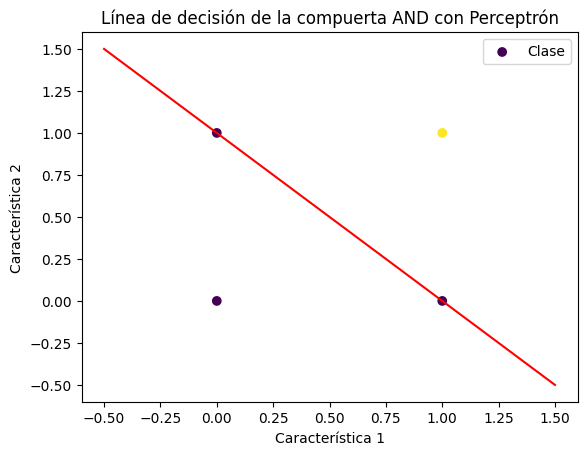

In [5]:
# Leer los atributos del modelo entrenado
coef = model.coef_[0,:]
intercept = model.intercept_

# Definir los límites para trazar la línea de decisión
x1_val = np.linspace(-0.5, 1.5, 100)

# Evaluar la ecuacion de la recta
x2_val = -(coef[0] / coef[1]) * x1_val - (intercept / coef[1])

# Graficar los puntos de datos y la línea de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, label='Clase')
plt.plot(x1_val, x2_val, color='r')

# Añadir título y etiquetas de los ejes
plt.title('Línea de decisión de la compuerta AND con Perceptrón')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Añadir leyenda
plt.legend(loc='best')
plt.show()

## 2. Perceptrón sobre un conjunto de datos aleatorio

La función **`make_classification`** devuelve una tupla que contiene un arreglo numpy de características (X) y un arreglo numpy de etiquetas de clase (y), que pueden ser utilizados para entrenar y evaluar modelos de clasificación.

* **`n_samples`**: Especifica el número total de muestras que se generarán en el conjunto de datos.

* **`n_features`**: Especifica el número de características (o dimensiones) de cada muestra.

* **`n_informative`**: Indica el número de características que son informativas y contribuyen a la relación entre las características y las etiquetas de clase. Las características informativas son las que realmente importan para la clasificación.

* **`n_redundant`**: Especifica el número de características redundantes. Estas características son generadas como combinaciones lineales de las características informativas. No aportan información adicional y pueden dificultar el proceso de clasificación.

* **`flip_y`**: es un parámetro que controla la proporción de etiquetas de clase invertidas en el conjunto de datos generado.

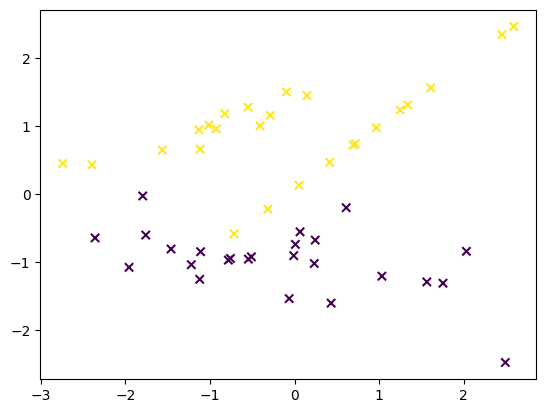

In [7]:
from sklearn.datasets import make_classification

# crear conjunto de datos repartidos en dos clases
X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, flip_y=0)

# gráfico de dispersión de los datos
plt.scatter(X[:, 0], X[:, 1], marker='x', c=y)
plt.show()

In [8]:
# Dividir conjunto en datos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Features:\n", X_train[0:5])
print("Etiquetas:\n", y_train[0:5])

Features:
 [[ 1.24881131  1.23379205]
 [-1.22002306 -1.03496138]
 [ 0.41495515  0.46864566]
 [-0.01038851 -0.9024627 ]
 [-1.12093957 -1.24968744]]
Etiquetas:
 [1 0 1 0 0]


## Introducción a la función `Perceptron` en scikit-learn

La función `Perceptron` en scikit-learn es una implementación del algoritmo de aprendizaje supervisado conocido como Perceptrón. El Perceptrón es un tipo básico de red neuronal de una sola capa que puede usarse para problemas de clasificación binaria.

**Argumentos más importantes:**
  
1. **`max_iter`**: Número máximo de iteraciones (épocas) sobre el conjunto de entrenamiento. Si el algoritmo no converge dentro de este número de iteraciones, se detendrá.
  
2. **`tol`**: Tolerancia para la detección de la convergencia. Cuando la pérdida o la precisión no mejora en al menos `tol` durante dos iteraciones consecutivas, se considera que el algoritmo ha convergido y se detiene.
  
3. **`shuffle`**: Booleano que indica si mezclar aleatoriamente las muestras en cada iteración. Mezclar las muestras puede ayudar a mejorar la convergencia en problemas con grandes conjuntos de datos.
  
4. **`eta0`**: Tasa de aprendizaje inicial. Este valor determina el tamaño de los pasos que el algoritmo toma durante el entrenamiento. Una tasa de aprendizaje demasiado grande puede hacer que el algoritmo diverja, mientras que una tasa de aprendizaje demasiado pequeña puede hacer que el entrenamiento sea lento.

5. **`early_stopping`**: Indica si se debe utilizar la parada temprana (early stopping) para evitar el sobreajuste. Si se establece en True, el entrenamiento se detendrá cuando la puntuación de validación no mejore.



In [10]:
# Crear un objeto Perceptron learning_rate=0.01, especificar otros parámetros
mi_perceptron = Perceptron(max_iter=100, alpha = 0.01, verbose=1)
# Entrenar el Perceptron
mi_perceptron.fit(X_train, y_train)

-- Epoch 1
Norm: 2.88, NNZs: 2, Bias: 0.000000, T: 35, Avg. loss: 0.149705
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.66, NNZs: 2, Bias: 0.000000, T: 70, Avg. loss: 0.311776
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.21, NNZs: 2, Bias: 0.000000, T: 105, Avg. loss: 0.083411
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.40, NNZs: 2, Bias: 2.000000, T: 140, Avg. loss: 0.232867
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.12, NNZs: 2, Bias: 1.000000, T: 175, Avg. loss: 0.125030
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.72, NNZs: 2, Bias: 1.000000, T: 210, Avg. loss: 0.209619
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.99, NNZs: 2, Bias: 2.000000, T: 245, Avg. loss: 0.061829
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.90, NNZs: 2, Bias: 1.000000, T: 280, Avg. loss: 0.169808
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 6.22, NNZs: 2, Bias: 1.000000, T: 315, Avg. loss: 0.099566
Total training time: 0.00 seconds.
-- 

Perceptron(alpha=0.01, max_iter=100, verbose=1)

Gráfico de dispersión para representar visualmente los datos y trazar la curva de decisión

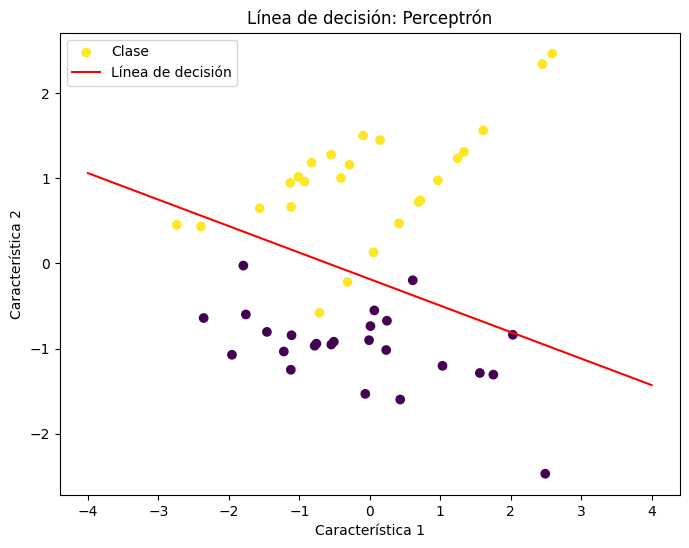

In [11]:
# Leer los atributos del modelo entrenado
w1 = mi_perceptron.coef_[0, 0]
w2 = mi_perceptron.coef_[0, 1]
bias = mi_perceptron.intercept_

# Definir los límites para trazar la línea de decisión
x_values = np.linspace(-4, 4, 100)
y_values = (-w1 / w2) * x_values - (bias/w2)

# Graficar los puntos de datos y la línea de decisión
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, label='Clase')
plt.plot(x_values, y_values, color='r', label='Línea de decisión')

# Añadir título y etiquetas de los ejes
plt.title('Línea de decisión: Perceptrón')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Añadir leyenda
plt.legend(loc='best')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = mi_perceptron.predict(X_test)

# Evaluar accuracy e imprimir
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


## 3. Clasificación binaria usando el Perceptron

La función **`load_breast_cancer()`** en scikit-learn carga el conjunto de datos de cáncer de mama Wisconsin. El conjunto de datos de cáncer de mama Wisconsin consta de características calculadas a partir de imágenes digitalizadas de aspirados de aguja fina (FNA) de una masa mamaria. Estas características se calculan a partir de una imagen digitalizada de un FNA, que describe las características nucleares presentes en la imagen. Las características incluyen medidas como el tamaño, la forma y la textura de las células nucleares.

Este conjunto de datos contiene un total de 569 instancias, cada una de las cuales está etiquetada como "maligna" o "benigna". El objetivo es predecir si un tumor es maligno o benigno en función de las características extraídas de la imagen del FNA.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
# Cargar dataset 'Breast Cancer'
data = load_breast_cancer()

X = data.data
y = data.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [10]:
print(data.target_names)
print(data.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [18]:
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Es necesario antes de ajustar el modelo a los datos, hacer una preparación que consista en dividir el conjunto de datos en **train** y **test** y luego escalar los datos.

In [16]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar datos de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'train_test_split' is not defined

In [ ]:
# Crear un objeto Perceptron: max_iter=50, learning_rate=0.1, especificar otros parámetros
# SU CÓDIGO AQUI

# Entrenar el Perceptron
# SU CÓDIGO AQUI

Para cerrar, es necesario evaluar el desempeño del modelo de clasificación:

## 4. Evaluación del modelo



In [ ]:
from sklearn.metrics import accuracy_score

# Evaluar accuracy e imprimir
# SU CÓDIGO AQUI

In [ ]:
import seaborn as sns

# Calcular matriz de confusión
# SU CÓDIGO AQUI

class_names = ['benign', 'malignant' ]
conf_matrix = np.flip(conf_matrix)

# Pintar matriz de confusión con seaborn
# SU CÓDIGO AQUI

plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

### Trabajo Autónomo 1

Con base en el análisis del resultado de la matriz de confusión, responde:

* ¿Qué representan los valores numéricos dentro de cada celda de la matriz? ¿A qué tipo de casos corresponden los valores de la diagonal principal? ¿Y los valores fuera de la diagonal?
* ¿Qué significa que haya un valor mas bajo en la celda de **Falsos Negativos** en comparación a la celda de **Falsos Positivos**?
* En el contexto del cáncer de mama que es preferible? Los falsos negativos (**no detectar un cáncer**) o los falsos positivos (**diagnosticar un cáncer que no existe**)?

### Trabajo Autónomo 2: Otras Métricas de Evaluación de la Clasificación

De lo anterior, podemos entonces hablar de un par de métricas adicionales para problemas de clasificación binaria:


**Precisión:**

$Precision = \frac{TP}{TP + FP}$

* Qué mide: La precisión mide la proporción de predicciones positivas que fueron realmente correctas.
* Intuición: La precisión responde a la pregunta "¿Cuántas de las cosas que dije que eran positivas realmente lo eran?"
* Ejemplo: Si nuestro modelo predijo 79 casos de pacientes con cancer de mama, ¿cuántos de ellos realmente tuvieron cancer?

**Recall:**

$Recall = \frac{TP}{TP + FN}$

* Qué mide: El recall mide la proporción de casos positivos que fueron correctamente identificados por el modelo.
* Intuición: El recall responde a la pregunta "¿Cuántas de las cosas positivas reales pude encontrar?"
* Ejemplo: Si en realidad hay 76 casos de pacientes con cancer de mama, ¿cuántos de ellos identificamos correctamente como pacientes con cancer?